<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M5L1_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Non Linear Support Vector Machines**

In [10]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

(100, 2) (100,)


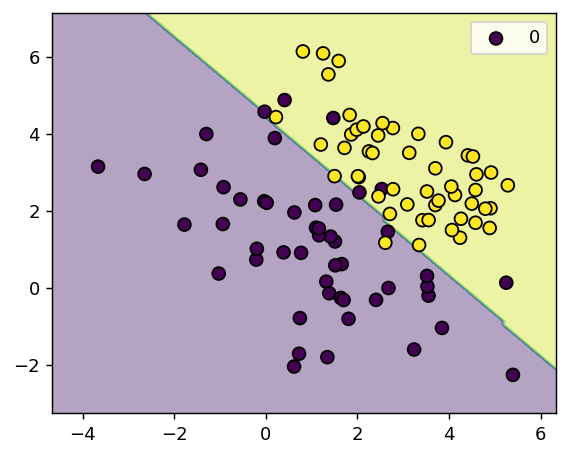

In [11]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))
print(X.shape, y.shape)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.legend(["0", "1"])
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)
  plt.show()

boundaryExp()

Kernel Trick

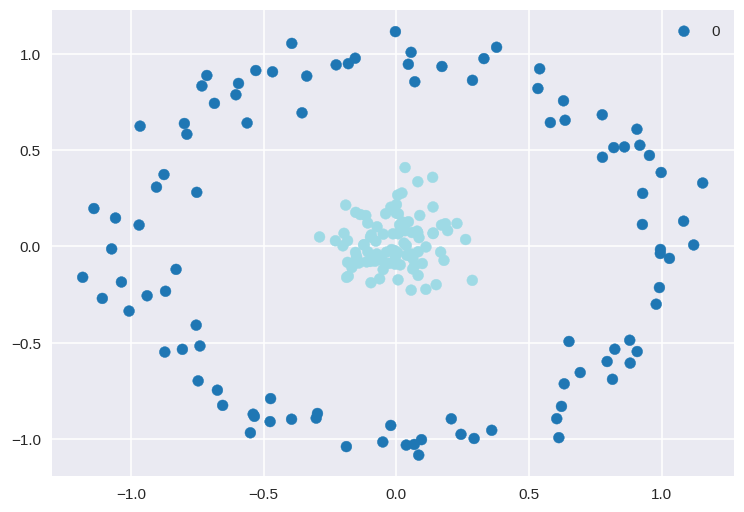

In [12]:
from sklearn.datasets import make_circles
X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.style.use("seaborn-v0_8")
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.gcf().set_dpi(110)
plt.legend(["0", "1"])

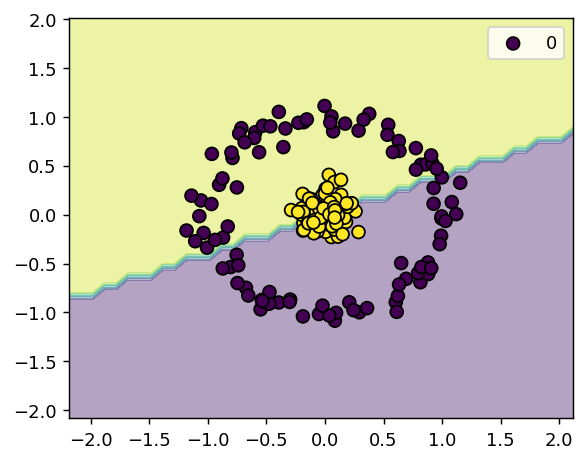

In [13]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

In [14]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [15]:
X_new = np.hstack((X, Z))

In [16]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

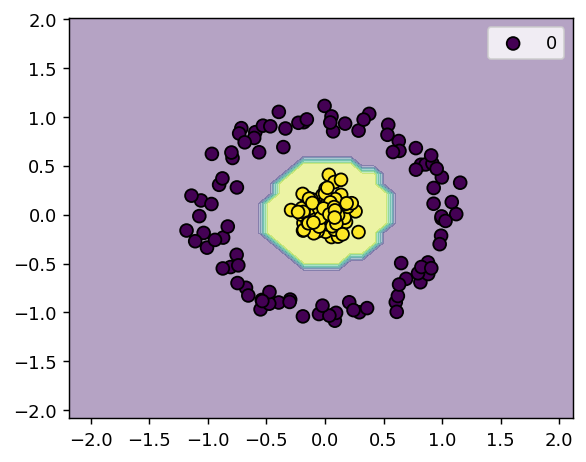

In [17]:
plt.style.use("default")
clf = svm.SVC(kernel='rbf')
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

In [18]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




**Tasks**

Task 1

**Try to run the same experiment after filtering different features, 2 at a time.**

Features: [0, 1], Kernel: rbf, Accuracy: 0.800


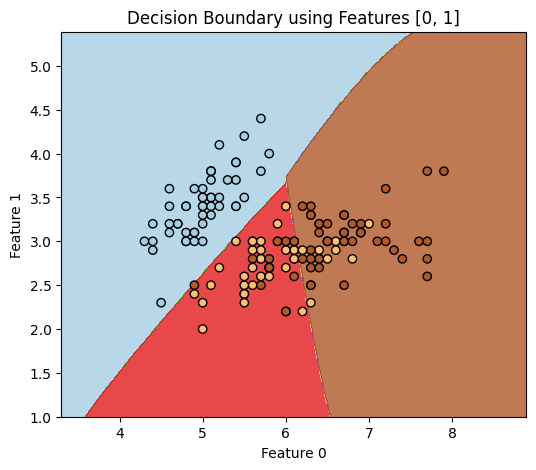

Features: [0, 2], Kernel: rbf, Accuracy: 0.978


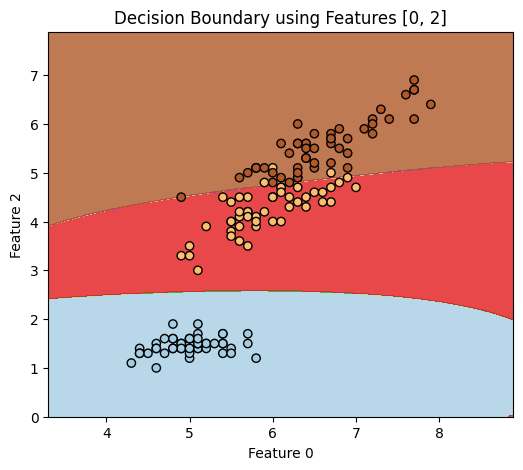

Features: [0, 3], Kernel: rbf, Accuracy: 0.956


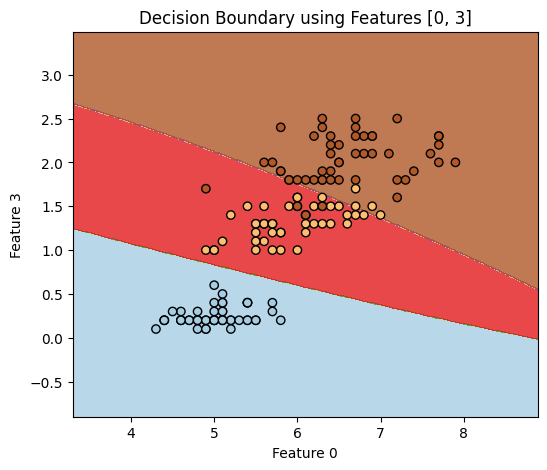

Features: [1, 2], Kernel: rbf, Accuracy: 0.956


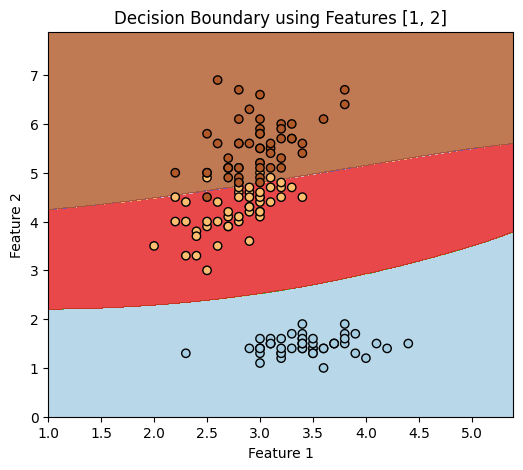

Features: [1, 3], Kernel: rbf, Accuracy: 0.956


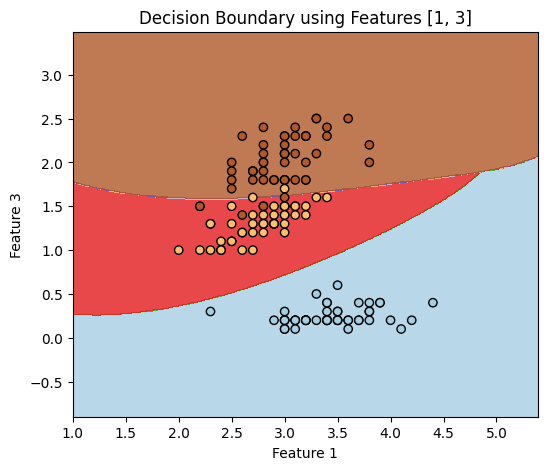

Features: [2, 3], Kernel: rbf, Accuracy: 0.978


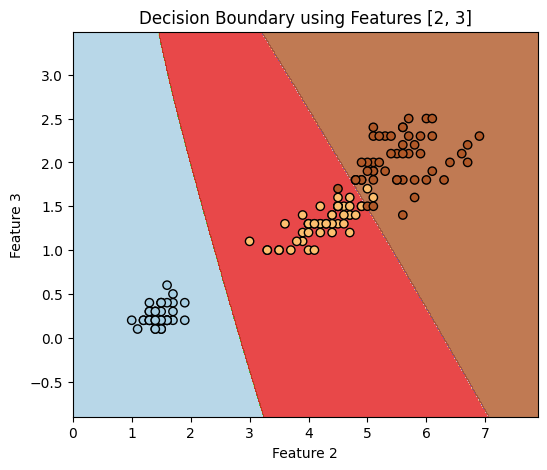

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Function to plot decision boundary for two selected features
def plot_decision_boundary_two_features(X, y, feature_indices, kernel_type='rbf'):
    X_filtered = X[:, feature_indices]
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, random_state=0, test_size=0.3)
    clf = SVC(kernel=kernel_type)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Features: {feature_indices}, Kernel: {kernel_type}, Accuracy: {accuracy:.3f}")

    # Plotting decision boundary
    x_min, x_max = X_filtered[:, 0].min() - 1, X_filtered[:, 0].max() + 1
    y_min, y_max = X_filtered[:, 1].min() - 1, X_filtered[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(f"Decision Boundary using Features {feature_indices}")
    plt.xlabel(f"Feature {feature_indices[0]}")
    plt.ylabel(f"Feature {feature_indices[1]}")
    plt.show()

# Loop through all combinations of two features
num_features = X.shape[1]
for i in range(num_features):
    for j in range(i + 1, num_features):
        plot_decision_boundary_two_features(X, y, [i, j])


Task 2

**Use different kinds of kernels for the SVM and plot it for Iris dataset -**

**1. linear**

**2. poly**

**3. rbf**

**4. sigmoid**

**5. precomputed**

Features: [0, 1], Kernel: linear, Accuracy: 0.800


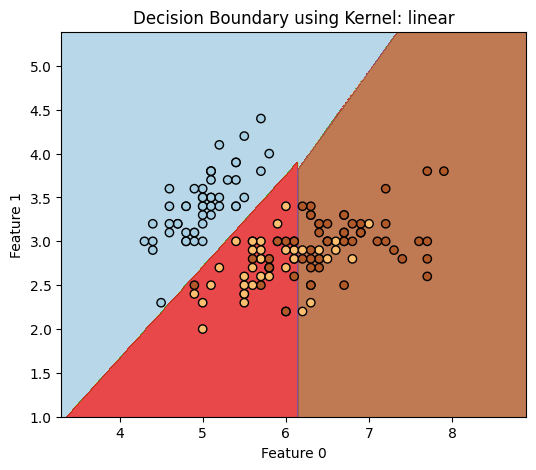

Features: [0, 1], Kernel: poly, Accuracy: 0.800


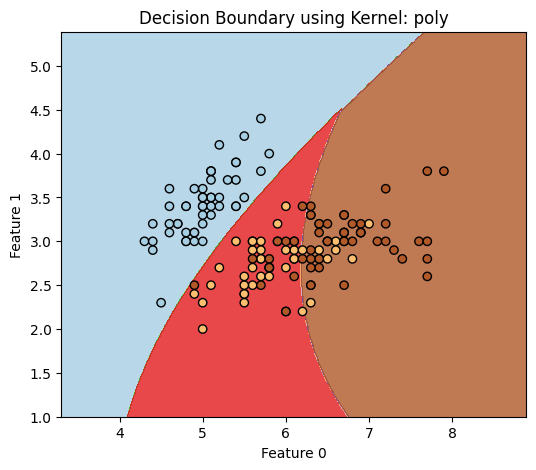

Features: [0, 1], Kernel: rbf, Accuracy: 0.800


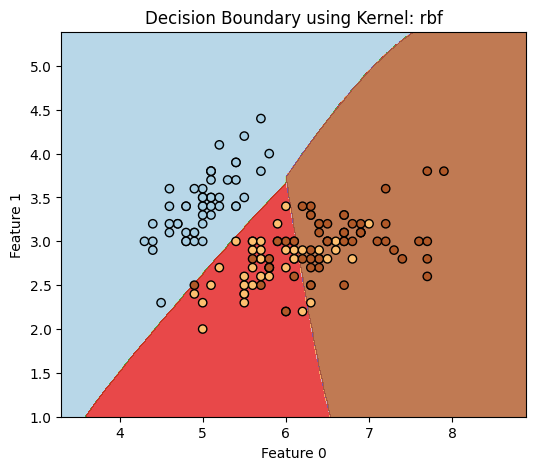

Features: [0, 1], Kernel: sigmoid, Accuracy: 0.244


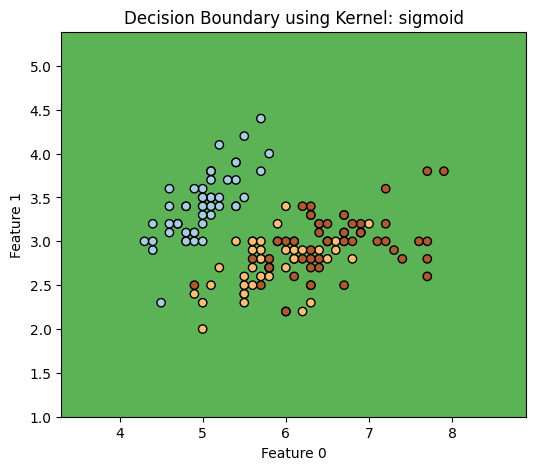

Features: [0, 1], Kernel: precomputed, Accuracy: 0.800


In [22]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Function to plot decision boundary for two selected features
def plot_decision_boundary_with_kernel(X, y, feature_indices, kernel_type):
    X_filtered = X[:, feature_indices]
    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, random_state=0, test_size=0.3)

    if kernel_type == "precomputed":
        # Precompute the kernel (linear kernel example)
        K_train = np.dot(X_train, X_train.T)
        K_test = np.dot(X_test, X_train.T)
        clf = SVC(kernel="precomputed")
        clf.fit(K_train, y_train)
        y_pred = clf.predict(K_test)
    else:
        clf = SVC(kernel=kernel_type)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Features: {feature_indices}, Kernel: {kernel_type}, Accuracy: {accuracy:.3f}")

    # Plot decision boundary (for non-precomputed kernels)
    if kernel_type != "precomputed":
        x_min, x_max = X_filtered[:, 0].min() - 1, X_filtered[:, 0].max() + 1
        y_min, y_max = X_filtered[:, 1].min() - 1, X_filtered[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(6, 5))
        plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
        plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
        plt.title(f"Decision Boundary using Kernel: {kernel_type}")
        plt.xlabel(f"Feature {feature_indices[0]}")
        plt.ylabel(f"Feature {feature_indices[1]}")
        plt.show()

# Select two features for visualization
feature_indices = [0, 1]  # You can change these indices for other feature combinations

# Test with different kernels
kernels = ["linear", "poly", "rbf", "sigmoid", "precomputed"]
for kernel in kernels:
    plot_decision_boundary_with_kernel(X, y, feature_indices, kernel)
